In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd /home/av/gitprojects/yolox/

/home/av/gitprojects/yolox


In [3]:
from tools.train import *
import mmcv
print('Num of devices:', torch.cuda.device_count())

Num of devices: 8


# Hyps

In [4]:
parser = make_parser()
args = mmcv.Config(parser.parse_known_args()[0].__dict__)

args.exp_file = './exps/rotated/nano.py'
args.experiment_name = 'nano-test'
args.devices = 1
args.batch_size = 4
args.occupy = False
args.output_dir = f'./work_dir/{args.name}'

# Model

In [5]:
exp = get_exp(args.exp_file, args.name)
exp.merge(args.opts)


In [6]:
from yolox.data import DataPrefetcher
loader = exp.get_data_loader(3, False)
# prefetcher = DataPrefetcher(loader)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


# Orientation prediction 

## Create model

In [7]:
trainer = Trainer(exp, args)

In [8]:
trainer.before_train()

2021-08-10 09:27:44.544 | INFO     | yolox.core.trainer:before_train:136 - args: Config (path: None): {'experiment_name': 'nano-test', 'name': None, 'dist_backend': 'nccl', 'dist_url': None, 'batch_size': 4, 'devices': 1, 'local_rank': 0, 'exp_file': './exps/rotated/nano.py', 'resume': False, 'debug': False, 'evaluate': False, 'ckpt': None, 'start_epoch': None, 'num_machines': 1, 'machine_rank': 0, 'fp16': False, 'occupy': False, 'opts': [], 'output_dir': './work_dir/None'}
2021-08-10 09:27:44.549 | INFO     | yolox.core.trainer:before_train:137 - exp value:
╒══════════════════╤════════════════════════════════════════════════════════════════════════════════╕
│ keys             │ values                                                                         │
╞══════════════════╪════════════════════════════════════════════════════════════════════════════════╡
│ seed             │ None                                                                           │
├──────────────────┼───────

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


2021-08-10 09:27:48.617 | INFO     | yolox.core.trainer:before_train:163 - init prefetcher, this might take one minute or less...
2021-08-10 09:27:49.336 | INFO     | yolox.core.trainer:before_train:193 - Training start...
2021-08-10 09:27:49.343 | INFO     | yolox.core.trainer:before_train:194 - 
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): DWConv(
          (dconv): BaseConv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            (act): SiLU(inplace=True)
          )
          (p

In [9]:
trainer.epoch = 0
trainer.before_epoch()

2021-08-10 09:27:49.404 | INFO     | yolox.core.trainer:before_epoch:204 - ---> start train epoch1


In [10]:
trainer.iter = 0

trainer.exp.print_interval= 1

In [11]:
# trainer.before_iter()
# trainer.train_one_iter()
# trainer.after_iter()

In [12]:

inps, targets = trainer.prefetcher.next()
inps = inps.to(trainer.data_type)
targets = targets.to(trainer.data_type)

In [22]:
from tqdm import tqdm
pbar = range(1)

for i in pbar:
    trainer.before_iter()
    trainer.train_one_iter(inps, targets)
    trainer.after_iter()

> /home/av/gitprojects/yolox/yolox/models/rotated_yolo_head.py(163)get_losses()
    162         import ipdb; ipdb.set_trace()
--> 163         bbox_preds = outputs[:, :, :5]  # [batch, n_anchors_all, 4]
    164         obj_preds = outputs[:, :, 5].unsqueeze(-1)  # [batch, n_anchors_all, 1]



ipdb>  origin_preds.shape


*** AttributeError: 'list' object has no attribute 'shape'


ipdb>  origin_preds[0].shape


*** IndexError: list index out of range


ipdb>  origin_preds[0]


*** IndexError: list index out of range


ipdb>  origin_preds


[]


ipdb>  expanded_strides


[tensor([[8., 8., 8.,  ..., 8., 8., 8.]], device='cuda:0'), tensor([[16., 16., 16.,  ..., 16., 16., 16.]], device='cuda:0'), tensor([[32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
         32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
      

ipdb>  expanded_strides[0].shape


torch.Size([1, 6400])


ipdb>  x_shifts


[tensor([[ 0.,  1.,  2.,  ..., 77., 78., 79.]], device='cuda:0'), tensor([[ 0.,  1.,  2.,  ..., 37., 38., 39.]], device='cuda:0'), tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
          8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,  0.,  1.,
          2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
         16., 17., 18., 19.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
         10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,  0.,  1.,  2.,  3.,
          4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
         18., 19.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
         12., 13., 14., 15., 16., 17., 18., 19.,  0.,  1.,  2.,  3.,  4.,  5.,
          6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
          0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,


ipdb>  x_shifts[0].shape


torch.Size([1, 6400])


ipdb>  q


BdbQuit: 

In [15]:
# with torch.no_grad():
#     targets.requires_grad = False
#     outputs = trainer.model(inps, targets)
#     loss = outputs["total_loss"]

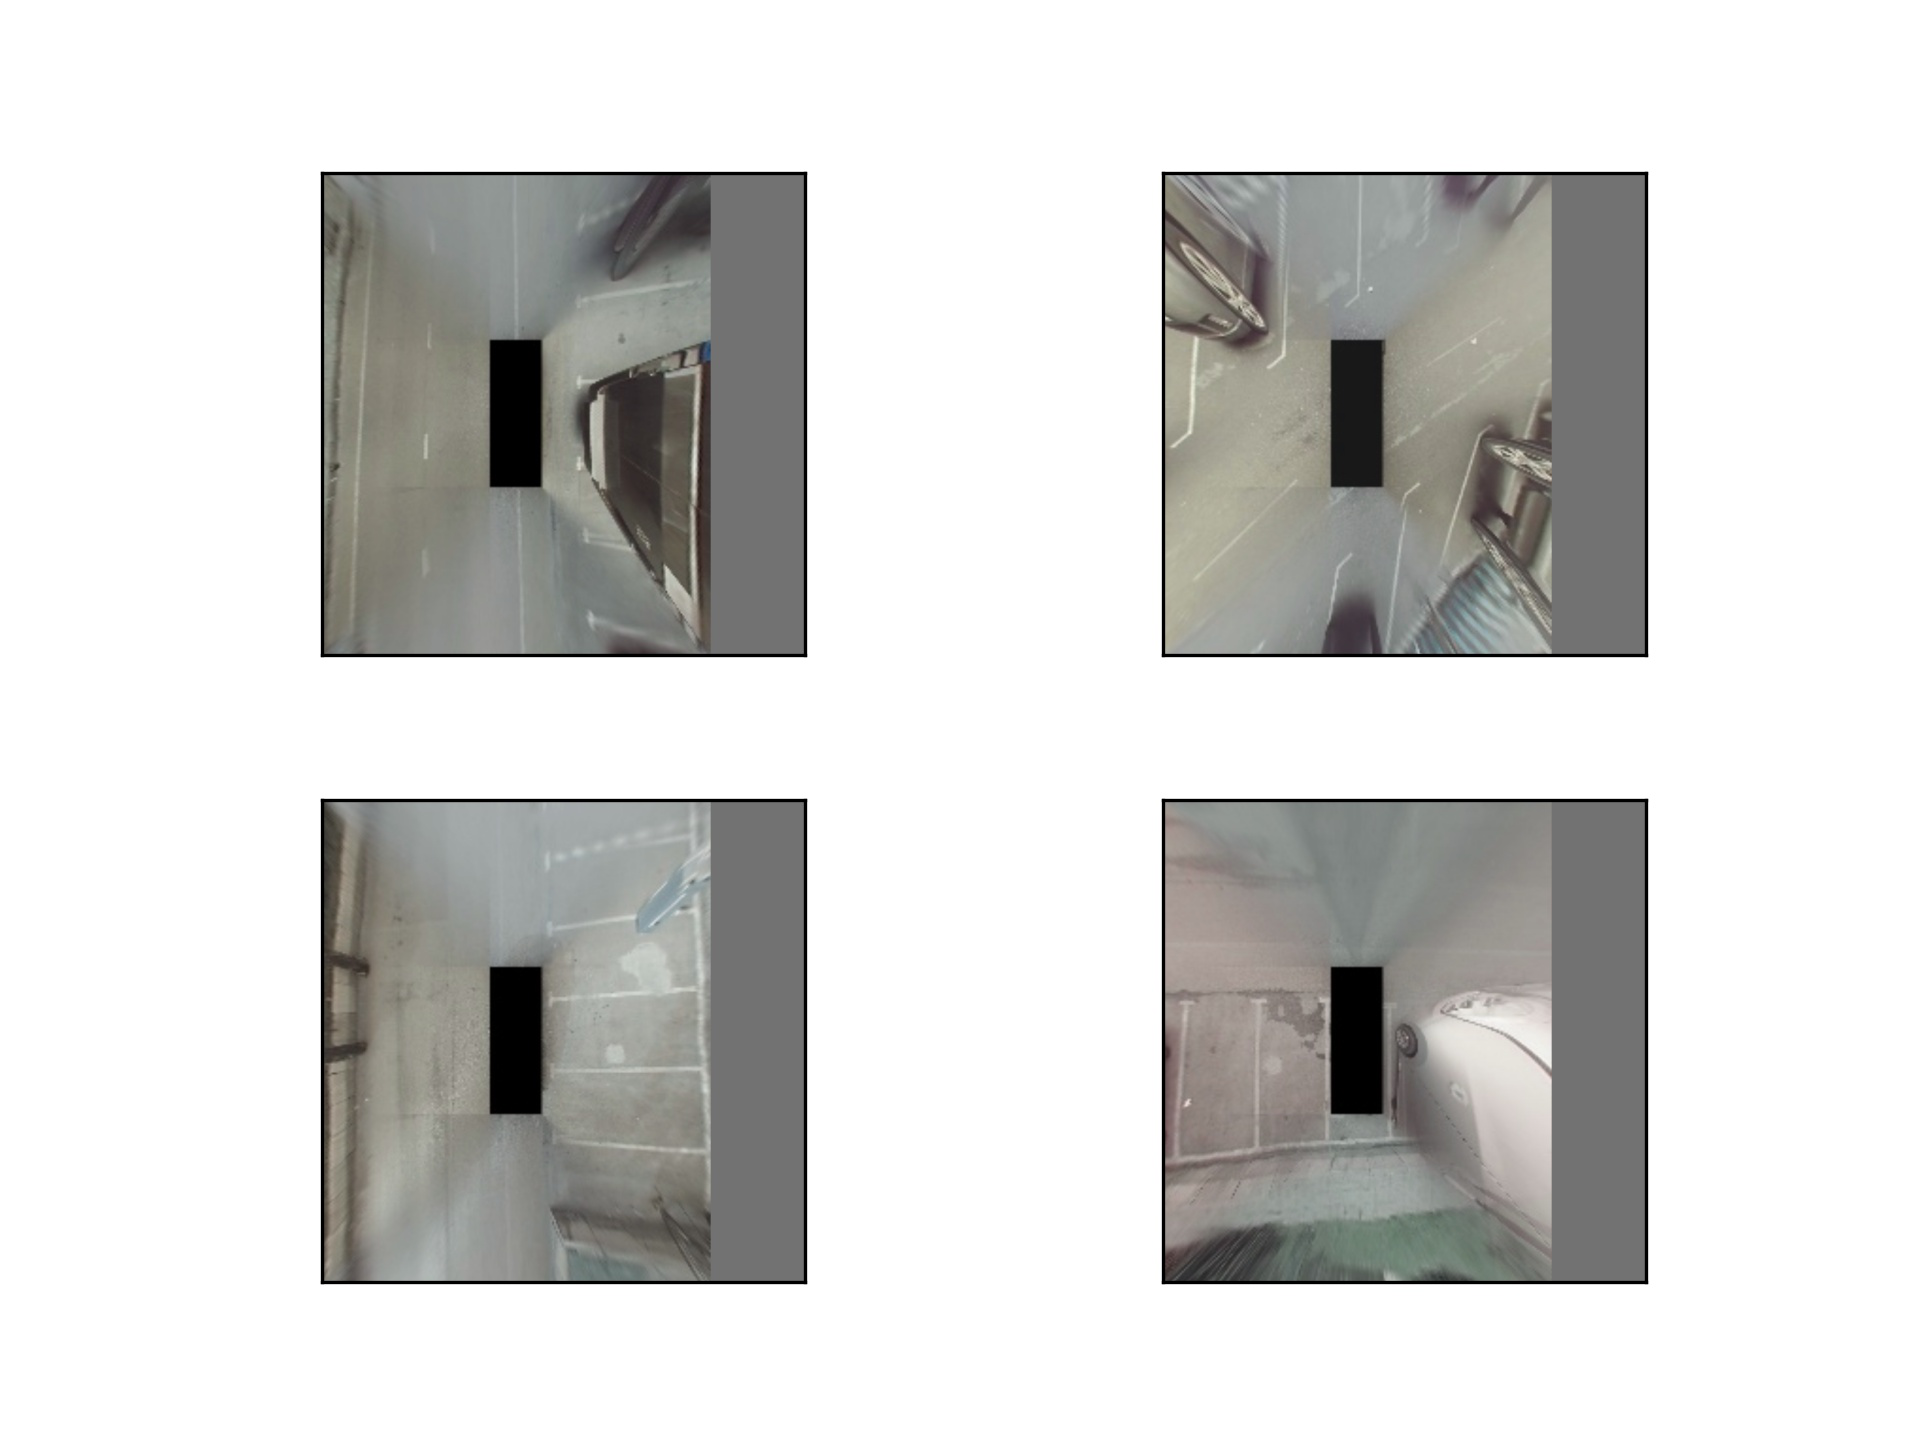

In [21]:
from PIL import Image
Image.open('test.jpg')